In [1]:
import pandas as pd
from final_project.notebooks.training_pipeline import auto_training_pipeline

In [2]:
df_appearances = pd.read_csv("../../data/football/raw/appearances.csv", low_memory=False)
df_players = pd.read_csv("../../data/football/raw/players.csv")
df_combined = pd.read_csv("../../data/football/processed/football_combined.csv")

Checking whether there is an H2O instance running at http://127.0.0.1:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.12+8-LTS-286, mixed mode, sharing)
  Starting server from C:\Users\eysto\dev\tabular-ds-project\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eysto\AppData\Local\Temp\tmpdlinqv2p
  JVM stdout: C:\Users\eysto\AppData\Local\Temp\tmpdlinqv2p\h2o_eysto_started_from_python.out
  JVM stderr: C:\Users\eysto\AppData\Local\Temp\tmpdlinqv2p\h2o_eysto_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_eysto_mblyc0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
features ['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name', 'image_url', 'url', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur']
AutoML progress: |
21:36:06.329: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
21:36:06.341: AutoML: XGBoost is not available; skipping it.
21:36:06.410: _train param, Dropping bad and constant columns: [name, player_code, url]

███
21:36:15.11: GLM_1_AutoML_1_20250311_213606 [GLM def_1] failed: Distributed

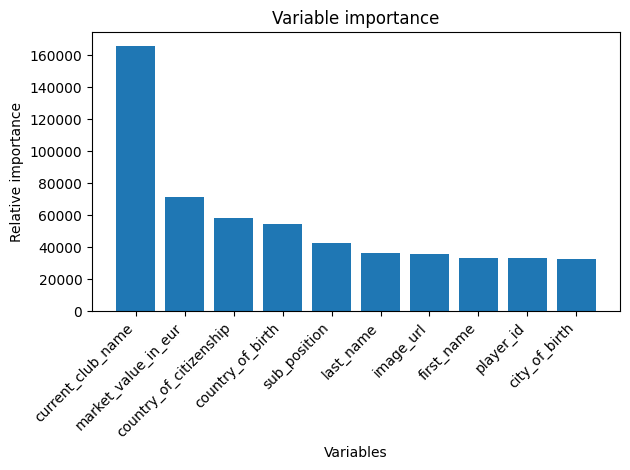

In [3]:
perf_players_reviews, best_model_players_reviews, leaderboard_players_reviews = auto_training_pipeline(
    df=df_players,
    target_col='highest_market_value_in_eur',
    max_runtime_secs=300,
    max_models=10,
    sort_metric='mse',
    balance_classes=False,
    print_metrics=True,
    show_scoring_history=True,
    show_variable_importance=True,
    shutdown_h2o_after_train=False
)

In [4]:
leaderboard_players_reviews

model_id,mse,mean_per_class_error,logloss,rmse
DRF_1_AutoML_1_20250311_213606,0.814761,0.88982,11.866,0.902641


In [5]:
best_model_players_reviews

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20250311_213606


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 9550                        2.09724e+07            1            20           9.7355        2             770           89.0928

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.8081651765412536
RMSE: 0.8989800757198424
LogLoss: 15.790393759582157
Mean Per-Class Error: 0.8877622039789593
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
10000.0    100000.0    1000000.0    10000000.0    100000000.0    1040000.0    1050000.0    10500000.0    1100000.0    11000000.0    110000000.0    11250000.0    1150000.0    11500000.0    11800000.0    1200000.0    12000000.0    120000000.0    12250000.0    125000.0    1250000.0    12500000.0    1300000.0    13000000.0    130000000.0    1350000.0    13500000.0    1400000.0    14000000.0    140000000.0    1450000.0    14500000.0    150000.0    1500000.0    15000000.0    150000000.0    1600000.0    16000000.0    160000000.0    1650000.0    16500000.0    1700000.0    17000000.0    17250000.0    175000.0    1750000.0    17500000.0    1800000.0    18000000.0    180000000.0    1850000.0    18500000.0    1900000.0    19000000.0    200000.0    2000000.0    20000000.0    200000000.0    2100000.0    21000000.0    2130000.0    2150000.0    21500000.0    2200000.0    22000000.0    225000.0    2250000.0    2300000.0    23000000.0    2400000.0    24000000.0    24500000.0    25000.0    250000.0    2500000.0    25000000.0    2600000.0    26000000.0    2650000.0    26500000.0    2700000.0    27000000.0    275000.0    2750000.0    27500000.0    2800000.0    28000000.0    28500000.0    2900000.0    29000000.0    300000.0    3000000.0    30000000.0    3100000.0    31000000.0    31500000.0    3200000.0    32000000.0    325000.0    3250000.0    3300000.0    33000000.0    3400000.0    34500000.0    350000.0    3500000.0    35000000.0    3600000.0    36000000.0    36500000.0    3700000.0    37000000.0    375000.0    3750000.0    3800000.0    38000000.0    3850000.0    3880000.0    400000.0    4000000.0    40000000.0    4100000.0    4200000.0    42000000.0    425000.0    4250000.0    4300000.0    4400000.0    450000.0    4500000.0    45000000.0    4600000.0    46000000.0    4700000.0    475000.0    4750000.0    47500000.0    4800000.0    48000000.0    50000.0    500000.0    5000000.0    50000000.0    5200000.0    525000.0    5250000.0    5300000.0    550000.0    5500000.0    55000000.0    555000.0    5600000.0    5700000.0    575000.0    5750000.0    5800000.0    600000.0    6000000.0    60000000.0    6200000.0    625000.0    6250000.0    650000.0    6500000.0    65000000.0    6600000.0    6700000.0    675000.0    6750000.0    6800000.0    700000.0    7000000.0    70000000.0    725000.0    7250000.0    75000.0    750000.0    7500000.0    75000000.0    7600000.0    775000.0    780000.0    7800000.0    800000.0    8000000.0    80000000.0    820000.0    8200000.0    825000.0    8250000.0    850000.0    8500000.0    85000000.0    8600000.0    875000.0    8750000.0    8800000.0    8900000.0    900000.0    9000000.0    90000000.0    925000.0    950000.0    9500000.0    9700000.0    nan     Error               Rate
---------  ----------  -----------  ------------  -------------  -----------  -

In [7]:
perf_combined_reviews, best_model_combined_reviews, leaderboard_combined_reviews = auto_training_pipeline(
    df=df_combined,
    target_col='highest_market_value_in_eur',
    max_runtime_secs=300,
    max_models=10,
    sort_metric='mse',
    balance_classes=False,
    print_metrics=True,
    show_scoring_history=True,
    show_variable_importance=True,
    shutdown_h2o_after_train=False
)

Checking whether there is an H2O instance running at http://127.0.0.1:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Jerusalem
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 9 days
H2O_cluster_name:,H2O_from_python_eysto_vdeomg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.977 Gb
H2O_cluster_total_cores:,24
H2O_cluster_allowed_cores:,24
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
features ['Unnamed: 0', 'player_id', 'player_club_id', 'player_current_club_id', 'date', 'player_name', 'competition_id', 'goals', 'assists', 'minutes_played', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position', 'foot', 'height_in_cm', 'contract_expiration_date', 'current_club_domestic_competition_id', 'current_club_name', 'market_value_in_eur']
AutoML progress: |
21:42:40.360: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████
21:45:52.866: GLM_1_AutoML_1_20250311_214239 [GLM def_1] failed: DistributedException from /127.0.0.1:54321: 'Java heap space', caused by java.lang.OutOfMemoryError: Java heap space

███████████████████████| (done) 100%
Test Metrics:
mse: 0.0360173060283822
R squared: 0.9999869316082354
AUC: NaN
Logloss: 0.7474272634188515


In [8]:
leaderboard_combined_reviews

model_id,mse,mean_per_class_error,logloss,rmse
GBM_1_AutoML_1_20250311_214239,0.987302,0.993633,5.05625,0.993631


In [9]:
best_model_combined_reviews

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250311_214239


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    0                  0                           0                      0            0            0             0             0             0

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.9873017160940191
RMSE: 0.9936305732484377
LogLoss: 5.05624580534804
Mean Per-Class Error: 0.9935990784967247
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
10000.0    100000.0    1000000.0    10000000.0    100000000.0    10500000.0    1100000.0    11000000.0    110000000.0    1150000.0    11500000.0    1200000.0    12000000.0    120000000.0    125000.0    1250000.0    12500000.0    1300000.0    13000000.0    130000000.0    1350000.0    13500000.0    1400000.0    14000000.0    140000000.0    1450000.0    150000.0    1500000.0    15000000.0    150000000.0    1600000.0    16000000.0    160000000.0    1650000.0    1700000.0    17000000.0    17250000.0    175000.0    1750000.0    17500000.0    1800000.0    18000000.0    180000000.0    1900000.0    19000000.0    200000.0    2000000.0    20000000.0    200000000.0    2100000.0    21000000.0    21500000.0    2200000.0    22000000.0    225000.0    2250000.0    2300000.0    23000000.0    2400000.0    24000000.0    25000.0    250000.0    2500000.0    25000000.0    2600000.0    26000000.0    2700000.0    27000000.0    275000.0    2750000.0    2800000.0    28000000.0    28500000.0    2900000.0    300000.0    3000000.0    30000000.0    3100000.0    3200000.0    32000000.0    325000.0    3250000.0    3300000.0    3400000.0    350000.0    3500000.0    35000000.0    3600000.0    36000000.0    3700000.0    37000000.0    375000.0    3750000.0    3800000.0    38000000.0    400000.0    4000000.0    40000000.0    4200000.0    42000000.0    425000.0    4300000.0    4400000.0    450000.0    4500000.0    45000000.0    4600000.0    475000.0    4750000.0    4800000.0    50000.0    500000.0    5000000.0    50000000.0    5200000.0    525000.0    5250000.0    550000.0    5500000.0    55000000.0    555000.0    575000.0    5750000.0    5800000.0    600000.0    6000000.0    60000000.0    625000.0    6250000.0    650000.0    6500000.0    65000000.0    675000.0    700000.0    7000000.0    70000000.0    75000.0    750000.0    7500000.0    75000000.0    775000.0    800000.0    8000000.0    80000000.0    8200000.0    825000.0    850000.0    8500000.0    85000000.0    875000.0    900000.0    9000000.0    90000000.0    925000.0    950000.0    9500000.0    nan       Error               Rate
---------  ----------  -----------  ------------  -------------  ------------  -----------  ------------  -------------  -----------  ------------  -----------  ------------  -------------  ----------  -----------  ------------  -----------  ------------  -------------  -----------  ------------  -----------  ------------  -------------  -----------  ----------  -----------  ------------  -------------  -----------  ------------  -------------  -----------  -----------  ------------  ------------  ----------  -----------  ------------  -----------  ------------  -------------  -----------  ------------  ----------  -----------  ------------  -------------  -----------  ------------  ------------  -----------  ------------  